<a href="https://colab.research.google.com/github/AnushkaBhatia1229/HR-Analytics/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***HR Analytics employee attrition and performance***

# IMPORT ***LIBRARIES***

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import os
import matplotlib.pyplot as plt


# IMPORT DATASET

In [ ]:
warnings.filterwarnings("ignore")
hr = pd.read_excel("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv.xlsx")
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# ***Exploratory Data Analysis (EDA)***


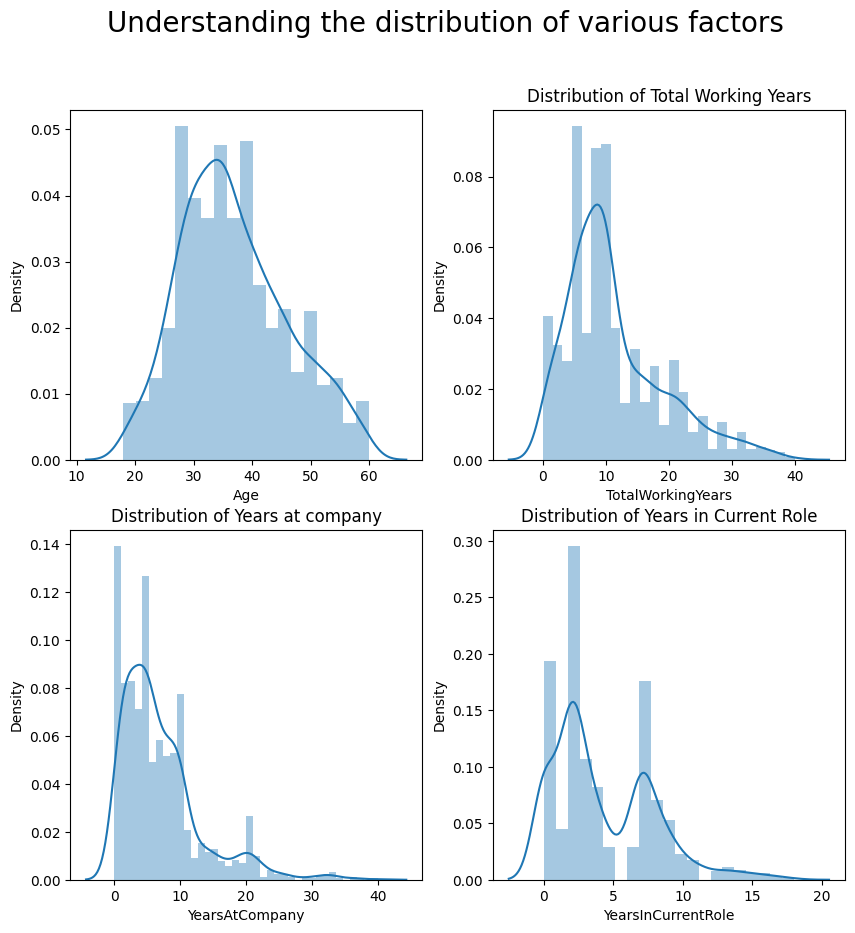

In [ ]:
fig,ax = plt.subplots (2,2, figsize=(10,10))
plt.suptitle("Understanding the distribution of various factors", fontsize=20)
sns.distplot(hr['Age'], ax = ax [0,0])
sns.distplot(hr['TotalWorkingYears'], ax = ax [0,1])
ax[0][1].set_title('Distribution of Total Working Years')
sns.distplot(hr['YearsAtCompany'], ax = ax [1,0])
ax[1][0].set_title('Distribution of Years at company')
sns.distplot(hr['YearsInCurrentRole'], ax = ax [1,1])
ax[1][1].set_title('Distribution of Years in\xa0Current\xa0Role')
plt.show()

From the plots, we find that majority of the employees are in the age group of 35-40 years and have a total experience of around 8-10 years. They have typically spent around 2-4 years at the current organization and have spent 2-3 years in the current role they are in.

# ***COUNT PLOT***

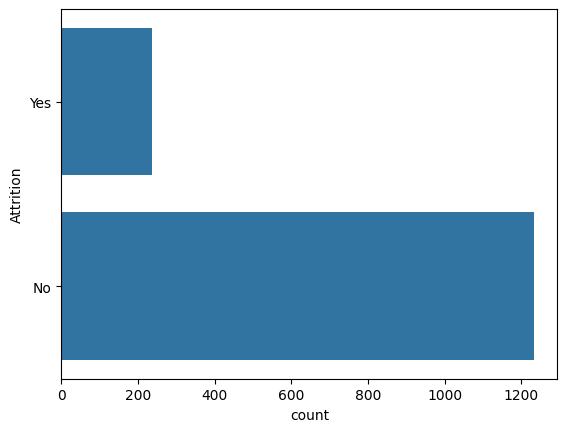

In [ ]:
sns.countplot(hr['Attrition'])
plt.show()

Above plot shows that around 250 people have left the organization while the organization has been able to retain around 1200 people.

# ***BAR PLOT***

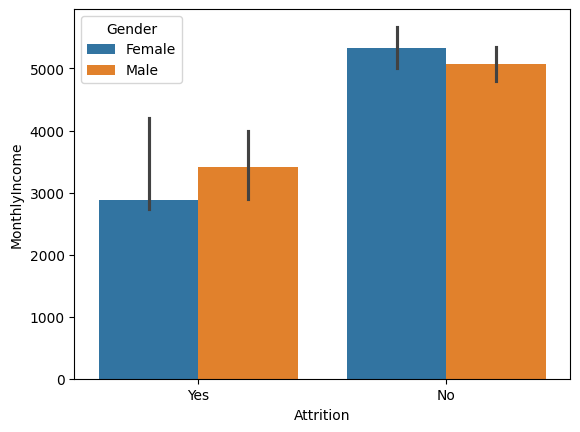

In [ ]:
#Bar plot of Monthly income from the rate of attrition according to gender
#Estimator used is median
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue='Gender', data=hr, estimator=median)
plt.show()



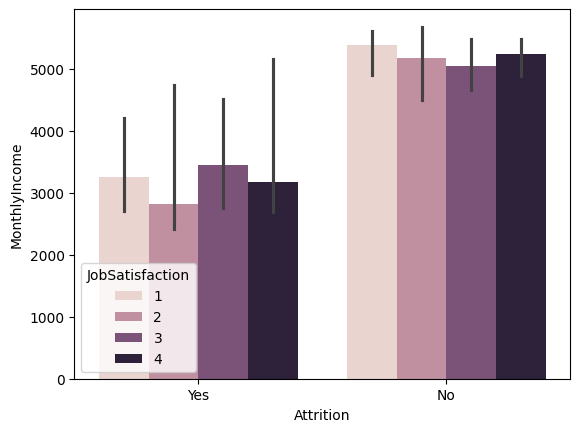

In [ ]:
#Bar plot of Job Satisfaction with respect to Monthly income from home according to gender
#Estimator used is median
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue = 'JobSatisfaction', data=hr, estimator=median)
plt.show()

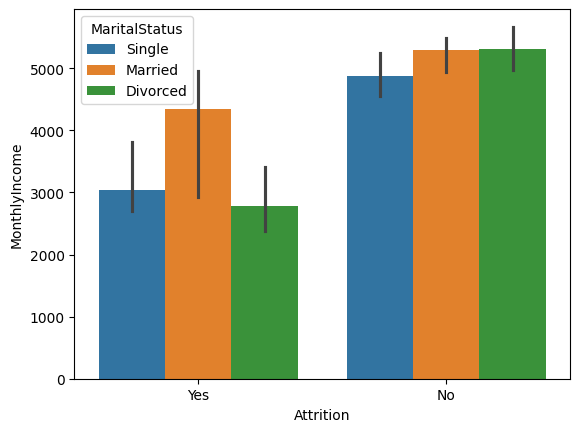

In [ ]:
#Bar plot of Job Satisfaction with respect to Monthly income from home according to gender
#Estimator used is median
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue = 'MaritalStatus', data=hr, estimator=median)
plt.show()

We can conclude that people with less monthlyincome (around 3000 units) are likely to leave the organization than those with better income (around 5000 units).

# BOX **PLOT**

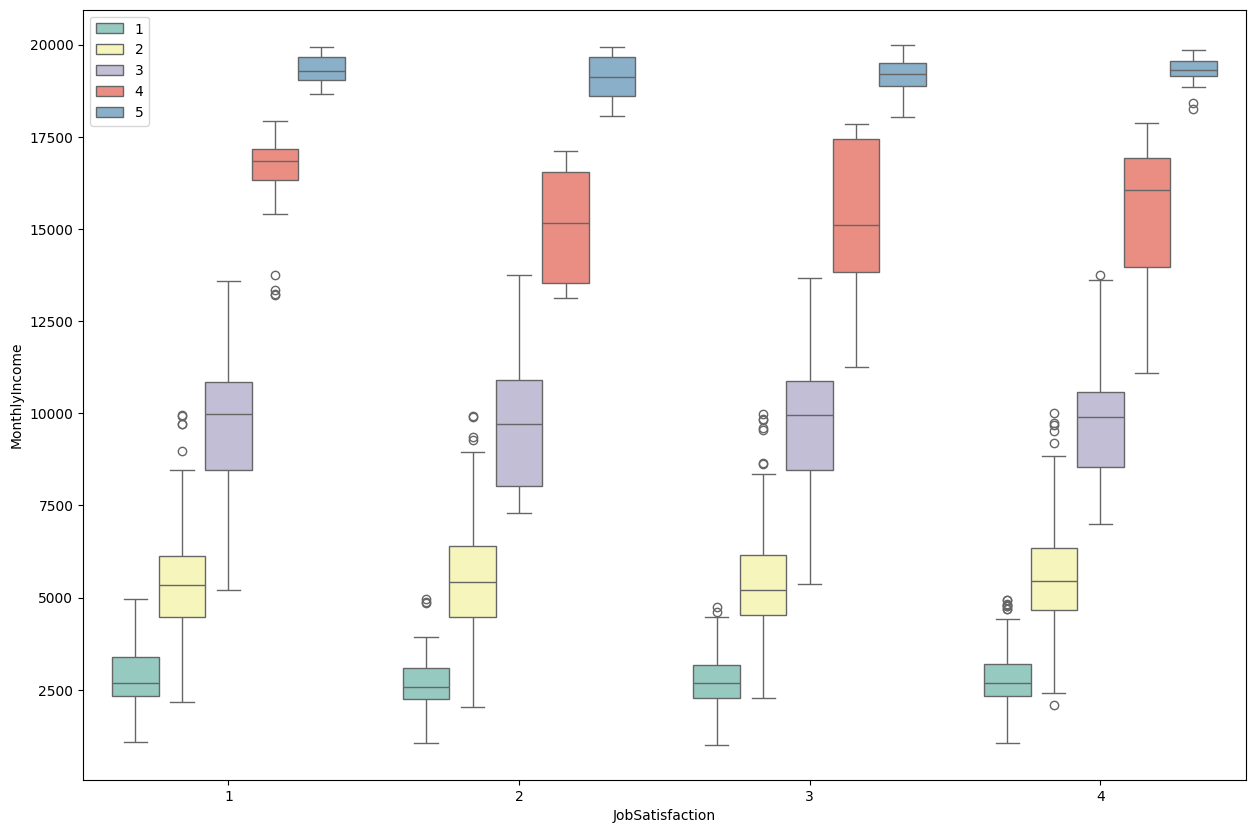

In [ ]:
f,ax= plt.subplots (figsize=(15,10))
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', data=hr, hue='JobLevel', palette="Set3")
plt.legend(loc='best')
plt.show()

We can clearly observe the difference in monthly income across different job levels. The difference in the monthly income is observed by the median value for different job satisfaction level.

# ***Violine Plot***

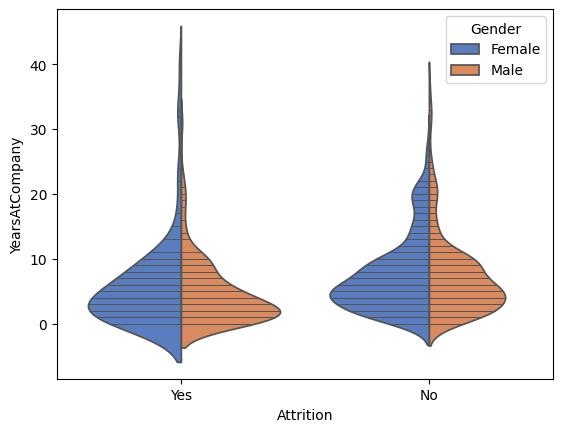

In [ ]:
sns.violinplot(x="Attrition", y="YearsAtCompany", hue="Gender", data=hr, palette="muted", split=True, inner="stick")

plt.show()


Violin plots are similar to box plots but they have the capability to explain the data better. The distribution of data is measured by the width of the violin plot. Here, we have plotted the number of years spent in an organization based on gender. The middle dashed line shows the median. The lines above and below the median show the interquartile range. The denser part shows the maximum population falls under that range and thinner part shows the lesser population. For details, please refer

https://blog.modeanalytics.com/violin-plot-examples/

# ***JOINT PLOT (SCATTER PLOT)***


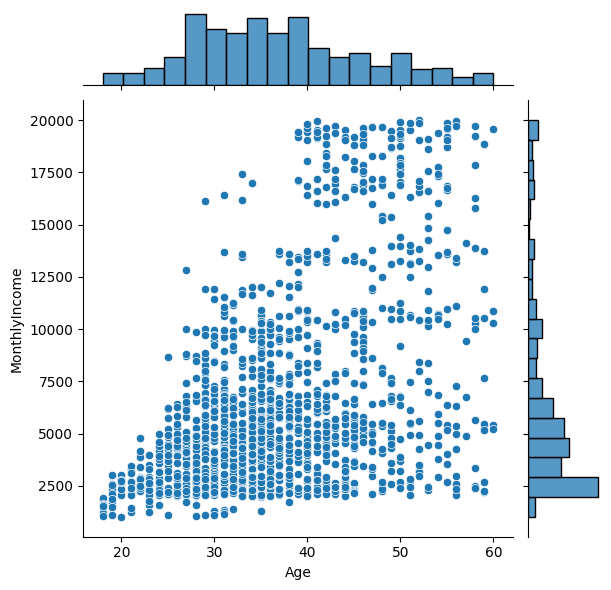

In [ ]:
sns.jointplot(x='Age', y='MonthlyIncome', data=hr, kind = "scatter")
plt.show()

Scatter plot shows the relationship between Age and Monthly Income. We can find a linear relationship. Further, the density plot above shows the distribution of age while density plot in the right shows the distribution of the monthly income.

# ***FACTOR PLOT AND FACET GRID***

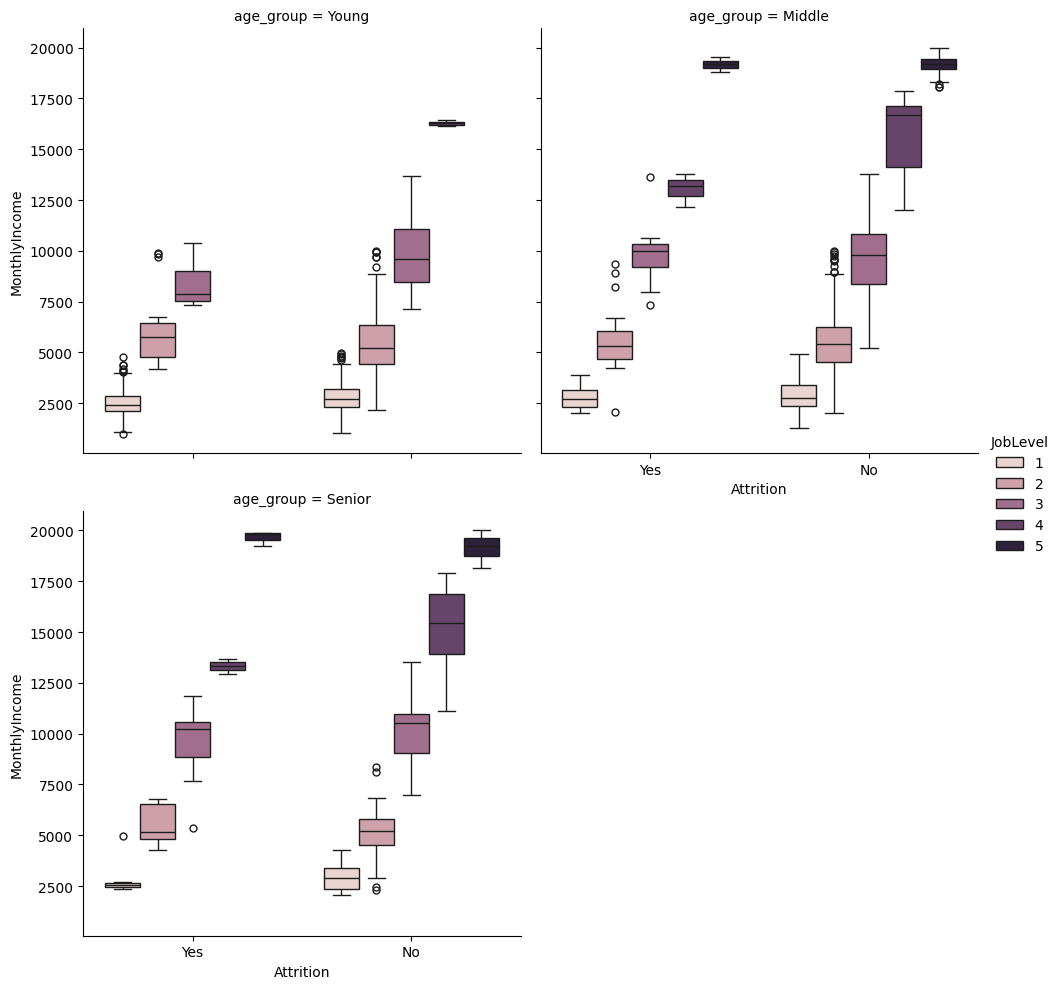

In [ ]:
hr['age_group'] = pd.cut(hr['Age'], 3, labels=['Young', 'Middle', 'Senior'])
sns.catplot(x ='Attrition',
               y ='MonthlyIncome',
               hue = 'JobLevel',
               col = 'age_group',
               col_wrap=2,
               kind = 'box',
               data = hr)
plt.show()

Above factor plot shows that monthly income plays an important role in retaining the employees in an organization. It can be observed across job levels and different age groups.

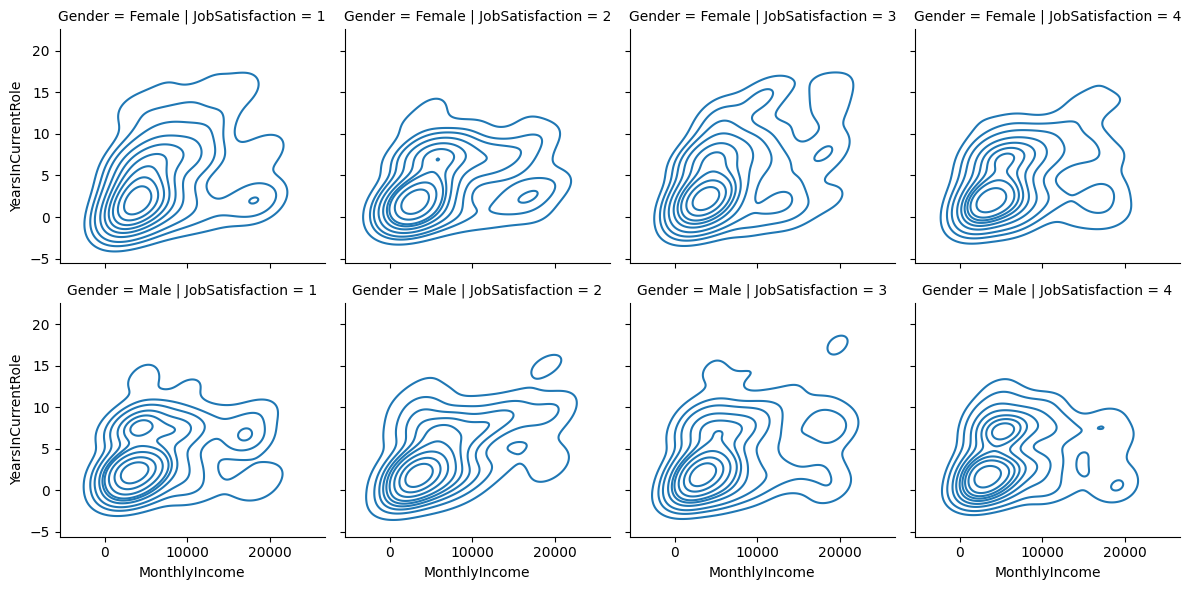

In [ ]:
g= sns.FacetGrid(hr, col="JobSatisfaction", row="Gender")
g.map(sns.kdeplot, "MonthlyIncome", "YearsInCurrentRole")
plt.show()

# ***PAIR PLOT***

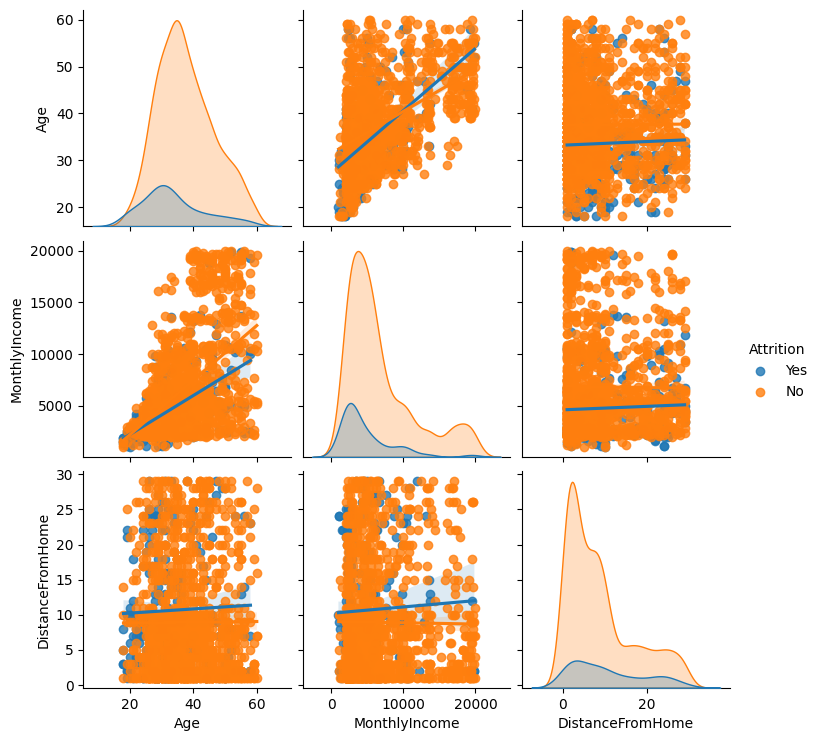

In [ ]:
data1 = ['Attrition', 'Age', 'MonthlyIncome', 'DistanceFromHome']
sns.pairplot(hr[data1], kind="reg", diag_kind="kde", hue = 'Attrition')
plt.show()

Pairwise plots between continuous variables show the relationship between them. For example, observing the relationship between Age and Monthly Income, we can find that with age, monthly income has increased but the increase is not similar for both groups (Attrition and Retention).

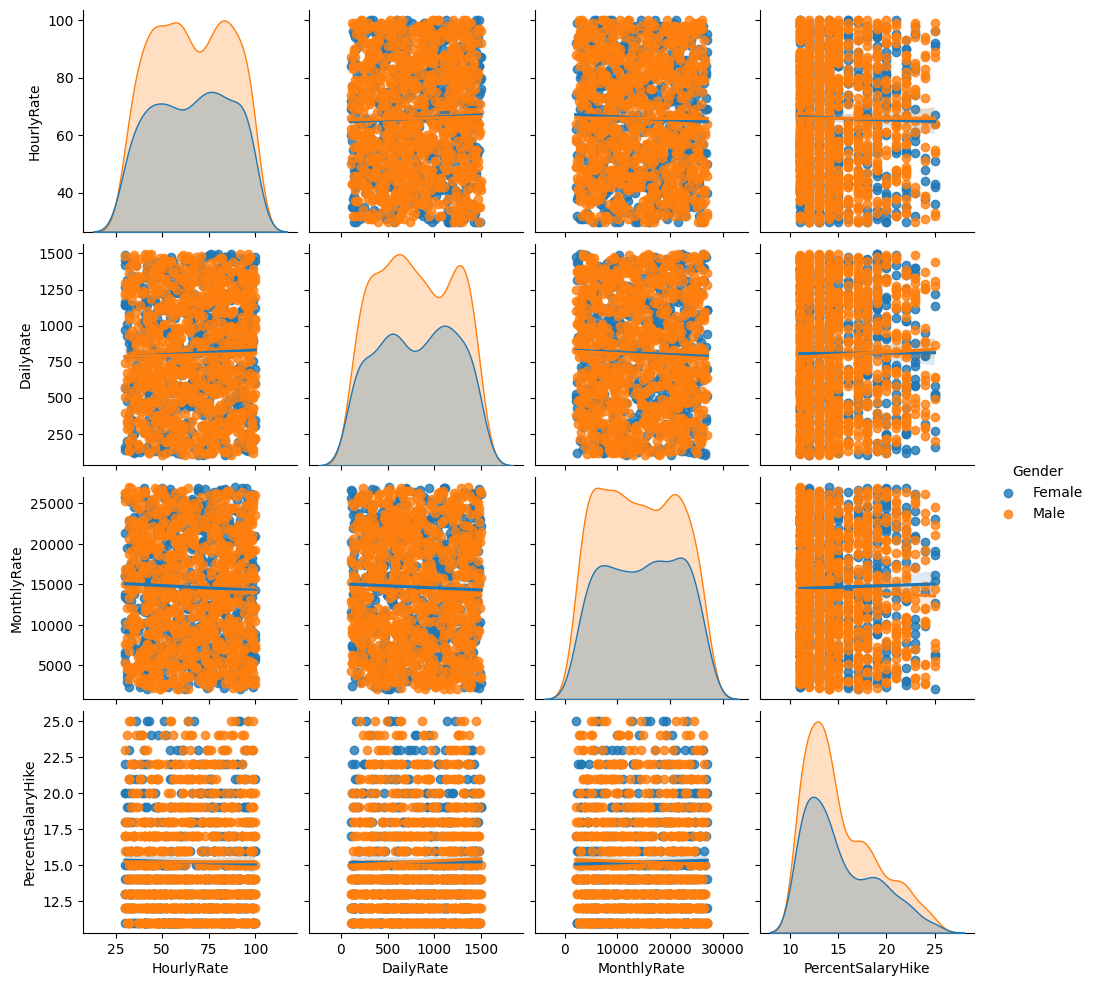

In [ ]:
data2 = ['Gender', 'HourlyRate', 'DailyRate', 'MonthlyRate', 'PercentSalaryHike']
sns.pairplot(hr[data2], kind="reg", diag_kind = "kde", hue = 'Gender')
plt.show()

The above plot does not convey much of any relationship between variables across gender. This shows that hourly rate, daily rate, monthly rate and percent salary hikelis same for both female and male employees.

# ***CORRELATION (HEAT) PLOT***

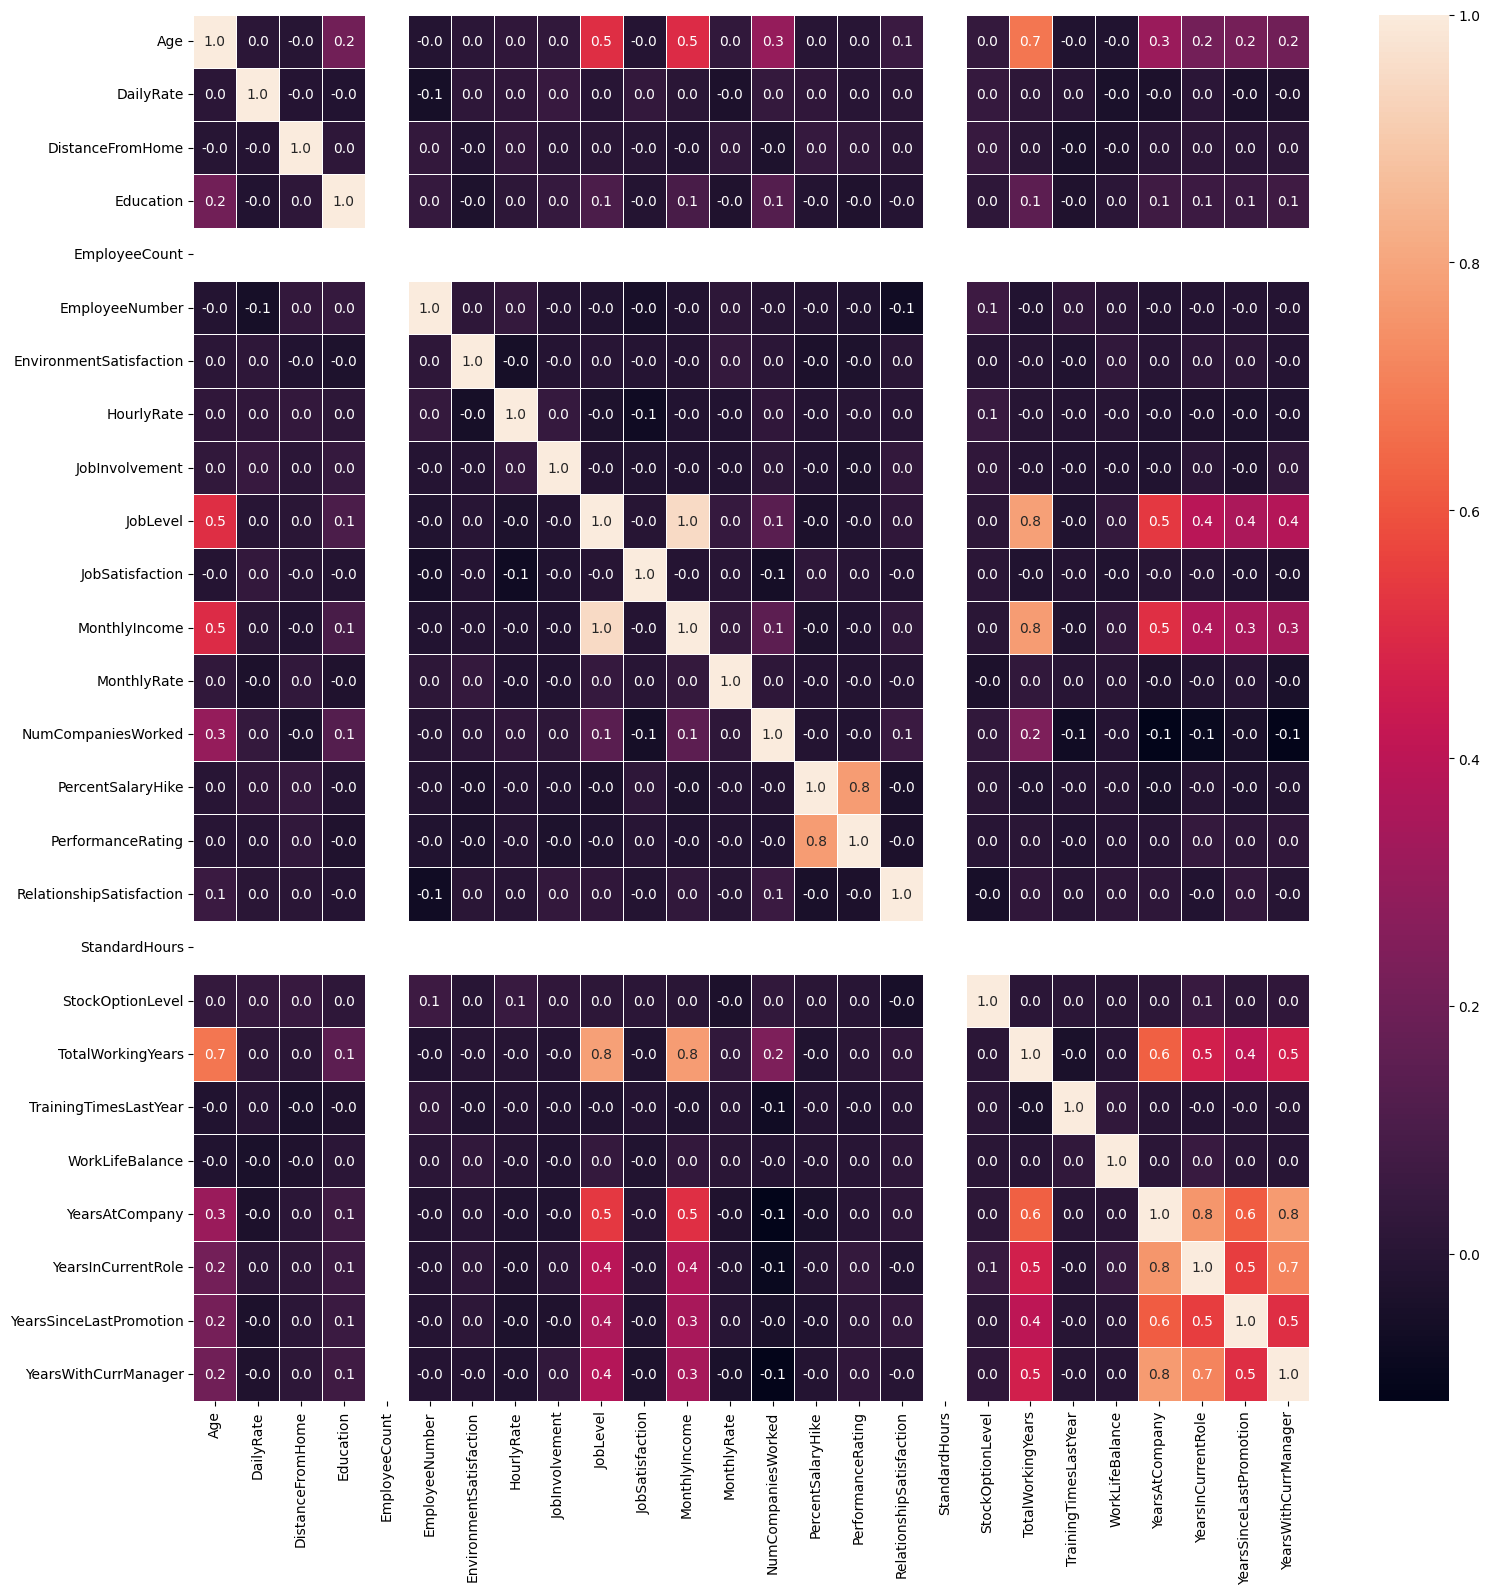

In [ ]:
#Plot a correlation map for all numeric variables
f,ax = plt.subplots (figsize=(18, 18))
sns.heatmap(hr.select_dtypes(include=np.number).corr(), annot=True, linewidths=.4, fmt= '.1f',ax=ax)
plt.show()

Tiwo variables are said to be highly correlation when they have a value of 0.7 or greater. The correlation plot between all continuous variables indicate that years at company and year with current manager, years in current role and years with current manager, monthly income and total working years, age and total working years, percent salary hike and performance rating are highly correlated.